# Week 5: Regression and Exploratory data analysis

# Rasika Bhalerao

# Agenda

- Explore Boston housing dataset
- Linear regression to predict price
- Logistic regression and ROC curves
- [Social bias in logistic regression](https://support.perspectiveapi.com/s/about-the-api-best-practices-risks)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston, fetch_openml, fetch_california_housing
import pandas
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [21]:
# load the Boston housing data
# boston = load_boston()
boston = fetch_california_housing()
X, Y = boston.data, boston.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:3500], Y[:3500]
test_data, test_labels = X[3500:], Y[3500:]

In [22]:
print (len(train_data), len(test_data))

3500 17140


In [23]:
df_boston = pandas.DataFrame(X, columns=boston.feature_names)
df_boston['PRICE'] =  boston.target
df_target = pandas.DataFrame(boston.target)
df_boston

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,4.526
1,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,3.585
2,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,3.521
3,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,3.413
4,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,3.422
...,...,...,...,...,...,...,...,...,...
20635,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26,0.781
20636,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89,0.771
20637,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90,0.923
20638,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93,0.847


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5019753490>,
      dtype=object)

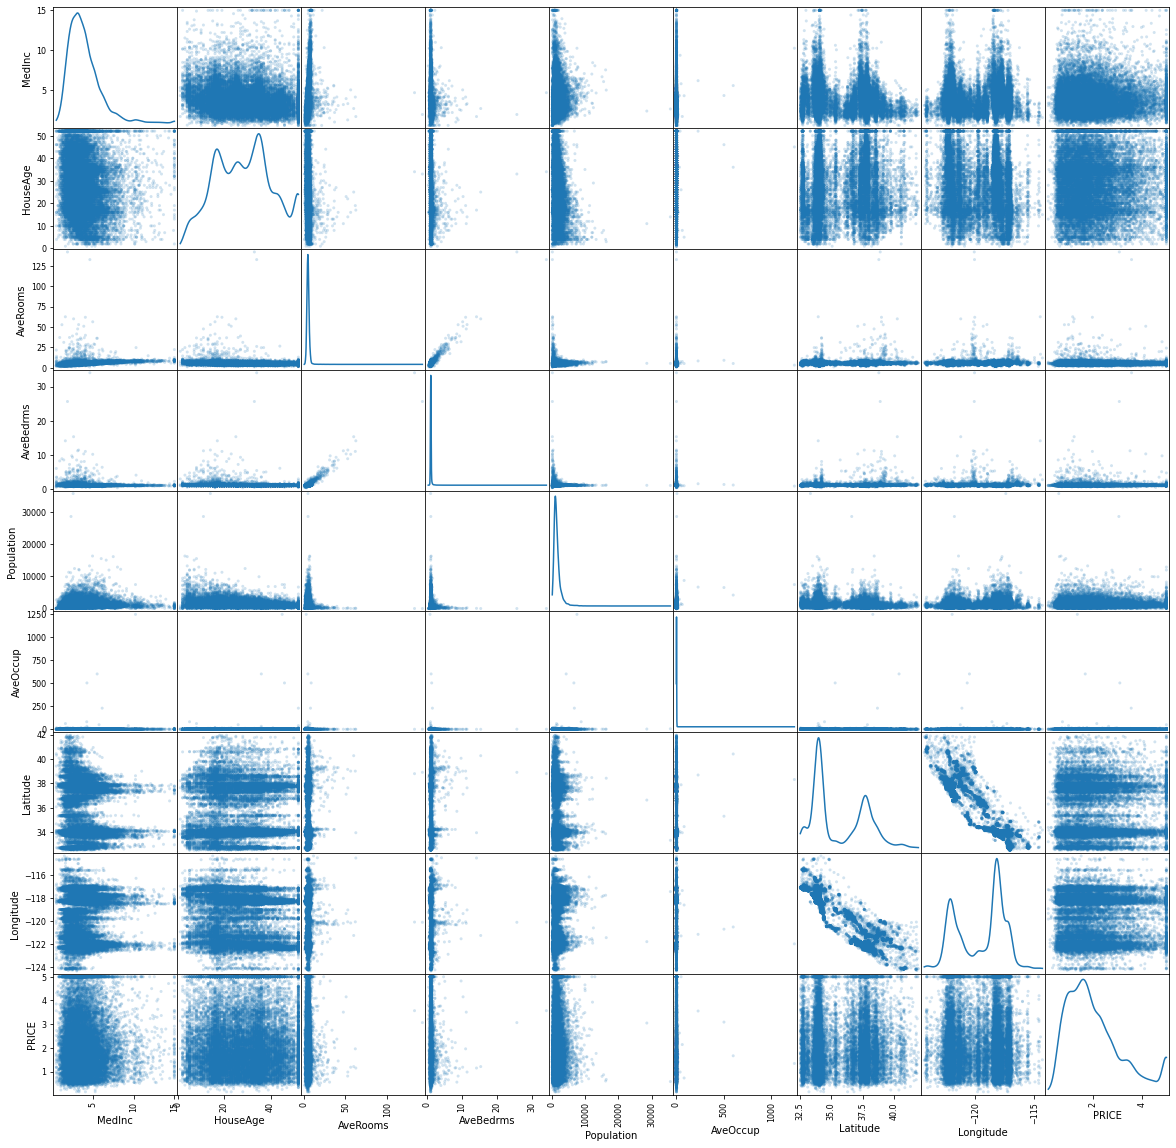

In [24]:
scatter_matrix(df_boston, alpha=0.2, figsize=(20, 20), diagonal='kde')
# kde makes it do a kernel density estimation of the feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f501b621d50>]],
      dtype=object)

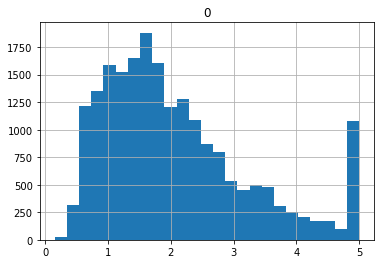

In [25]:
# check out just the home prices
df_target.hist(bins=25)

In [26]:
# regression
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)

LinearRegression()

In [27]:
lr_model.intercept_, lr_model.coef_

(-38.126204367419554,
 array([ 4.44428248e-01,  9.33885627e-03, -1.34837392e-01,  8.42109212e-01,
         1.30588858e-05, -3.40481332e-03, -4.28733883e-01, -4.45584409e-01]))

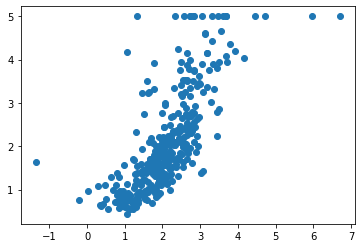

In [11]:
# how good is the regression?
predicted_train_values = lr_model.predict(train_data)
plt.scatter(predicted_train_values, train_labels)

(-2.0, 7.0)

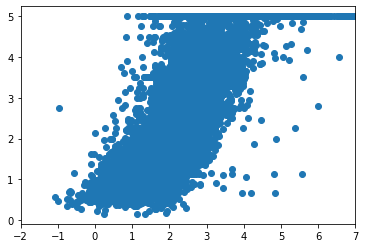

In [33]:
predicted_test_values = lr_model.predict(test_data)
fig, ax = plt.subplots()
ax.scatter(predicted_test_values, test_labels)
ax.set_xlim(-2, 7)

In [37]:
?lr_model.score

In [35]:
lr_model.score(test_data, test_labels)

0.6059304190951682

In [ ]:
# Exercise: this data is from a time period where "above $50000" was so unimaginably
# big that here, they just labeled it as $50000. How does this affect the regression?
# What can we do about it?

### Logistic regression

In [36]:
# Load the digits dataset from https://www.openml.org/d/554
# use only 4s and 9s
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
X, Y = X[:1000], Y[:1000]
X = X / 255.0
indices = [i == '4' or i == '9' for i in Y]
features = X[indices]
targets = Y[indices]

# regression
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

lr_model.score(x_test, y_test)

0.9230769230769231

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


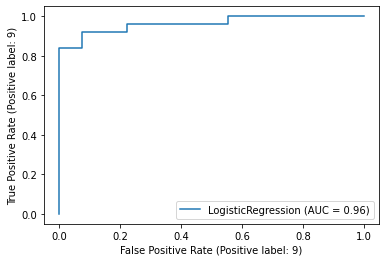

In [38]:
# The default threshold for classification is 0.5
# What if false positives are much worse than false negatives (or vice versa)?

plot_roc_curve(lr_model, x_test, y_test)